# Support Vector Rregression

In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [3]:
from sklearn.svm import SVR
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class SVRRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="SVR"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = SVR
        if params is None:
            self.params = {
                'kernel': 'rbf',
                'C': 1.0,
                'epsilon': 0.1,
                'gamma': 'scale'
            }
        if params_space is None:
            self.params_space = {
                'C': Real(0.01, 100.0, prior='log-uniform'),
                'gamma': Real(0.01, 10.0, prior='log-uniform'),
                'epsilon': Real(0.001, 1.0),
                'kernel': Categorical(['linear', 'rbf', 'poly'])
            }

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import numpy as np
import pickle

#save_path=f'{path}SVR/'
file_name = 'Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

# Crear una instancia del modelo XGBoost
svr_model = SVRRegressor()
svr_model.set_data(X,y)

In [4]:
svr_model.model_params_search = {
            'max_iter': 5000
        }

# Busqueda Hiperparametros

In [ ]:
opt_svr, best_params_svr = svr_model.SearchBestModel(X, y, n_iter_=1000, early_stop=False, save_result=True)
with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/SVR/Modelos/opt_SVR_model_all_features.pickle', 'wb') as file:
    pickle.dump(opt_svr, file)

In [5]:
with open(f'{path}Opt_Model/opt_SVR_model_all_features.pickle', 'rb') as file:
    opt_svr= pickle.load(file)
    best_params_svr = opt_svr.best_params_

In [18]:
resultados = opt_svr.cv_results_
svr_model.guardar_resultados_busqueda(resultados=resultados)

C:\Users/felipe/Documents/Brain\base_regressor.py:311: RuntimeWarning: overflow encountered in exp
  return C * (1-np.exp(-t / tau)) + b
C:\Users/felipe/Documents/Brain\base_regressor.py:254: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(self.exponential_decay, t, y_true, p0=[C_true, tau_true, b_true])


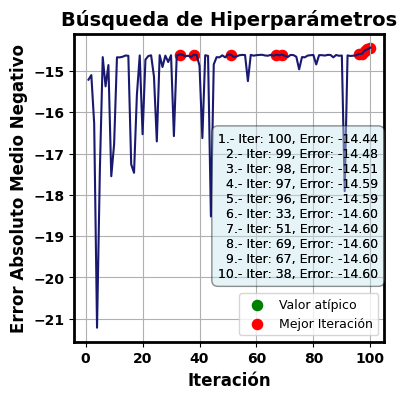

Top 1: Iteración 100, Error -14.437970967596282
Top 2: Iteración 99, Error -14.476463522937058
Top 3: Iteración 98, Error -14.510482791338655
Top 4: Iteración 97, Error -14.589174609099766
Top 5: Iteración 96, Error -14.589452745916082
Top 6: Iteración 33, Error -14.602961105938274
Top 7: Iteración 51, Error -14.603417908484138
Top 8: Iteración 69, Error -14.603699071026242
Top 9: Iteración 67, Error -14.604665522800147
Top 10: Iteración 38, Error -14.604969723775943


In [6]:
svr_model.plot_search_best_model(opt_svr, linewidth=1.5, color='midnightblue', num_max=100)

In [7]:
best_params_svr = svr_model.best_hyper(opt_svr,num_max=100)

In [8]:
best_params_svr

[{'C': 100.0, 'epsilon': 1.0, 'gamma': 0.01723069047203692, 'kernel': 'rbf'},
 {'C': 100.0, 'epsilon': 1.0, 'gamma': 0.014628809081754988, 'kernel': 'rbf'},
 {'C': 100.0,
  'epsilon': 0.870631774763892,
  'gamma': 0.01274859861482185,
  'kernel': 'rbf'},
 {'C': 100.0, 'epsilon': 0.40062287625045717, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 100.0, 'epsilon': 0.001, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 29.51422872260496,
  'epsilon': 0.001,
  'gamma': 0.04139164550946261,
  'kernel': 'linear'},
 {'C': 29.450135191549876,
  'epsilon': 0.008807573755144476,
  'gamma': 10.0,
  'kernel': 'linear'},
 {'C': 27.43146868152206,
  'epsilon': 0.001,
  'gamma': 0.5337160859383144,
  'kernel': 'linear'},
 {'C': 31.236286882610578,
  'epsilon': 0.001,
  'gamma': 0.048034170110812055,
  'kernel': 'linear'},
 {'C': 26.311407634341936,
  'epsilon': 0.001,
  'gamma': 0.022550246984866573,
  'kernel': 'linear'}]

# Trainer

In [9]:
svr_model.model_params_train= {
            'max_iter': 5000
        }

In [10]:
results, best_model_results , best_model= svr_model.trainer(params_=best_params_svr[0])

In [11]:
#with open(f'{path}Opt_Model/BestModel_SVR_all_features.pickle', 'wb') as file:
#    pickle.dump(svr_model.model, file)
#with open(f'{path}Opt_Model/results_SVR_model_all_features.pickle', 'wb') as file:
#    pickle.dump(results, file)

In [5]:
with open(f'{path}Opt_Model/BestModel_SVR_all_features.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Opt_Model/results_SVR_model_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

In [6]:
svr_model.model=model

In [28]:
svr_model.guardar_resultados_trainer(resultados=results)

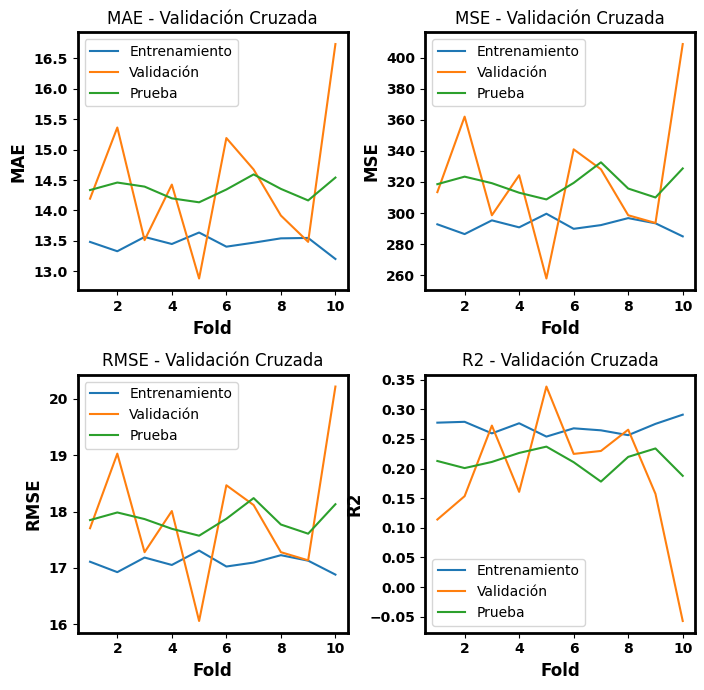

In [7]:
svr_model.plot_metricas_evaluacion(results)

In [8]:
y_pred = svr_model.predicter(svr_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     102.9
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           9.61e-21
Time:                        23:14:52   Log-Likelihood:                -1050.5
No. Observations:                 276   AIC:                             2105.
Df Residuals:                     274   BIC:                             2112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.7261      1.681     20.653      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


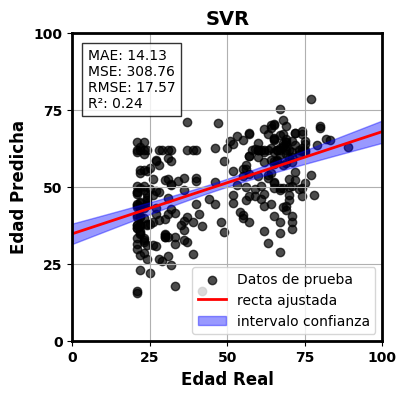

Error medio absoluto: 14.134454498052657
Error cuadrático medio: 308.76315118707197
Raíz del error cuadrático medio: 17.571657610682948
Coeficiente de determinación (R²): 0.23707045976771646


In [9]:
svr_model.plot_regresion(y=y_pred,x= svr_model.y_test,label_='Datos de prueba' ,x_ticks_step=25,y_ticks_step=25,x_max_limit=100,y_max_limit=100, title='SVR',line_ideal=False,confidence_interval=True, color='black',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [10]:
y_pred_train=svr_model.predicter(svr_model.X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     419.4
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           3.29e-79
Time:                        23:14:55   Log-Likelihood:                -4133.1
No. Observations:                1101   AIC:                             8270.
Df Residuals:                    1099   BIC:                             8280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5609      0.834     42.622      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


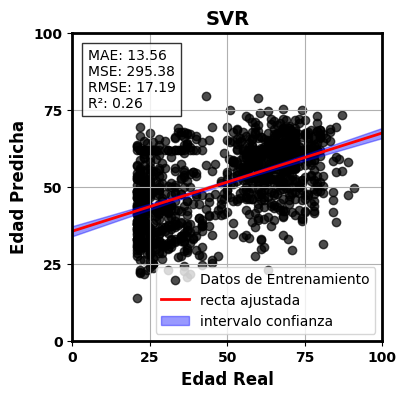

Error medio absoluto: 13.562288910686698
Error cuadrático medio: 295.379710836858
Raíz del error cuadrático medio: 17.186614292432875
Coeficiente de determinación (R²): 0.2623228780629846


In [11]:
svr_model.plot_regresion(y=y_pred_train,x= svr_model.y_train,label_='Datos de Entrenamiento' ,x_ticks_step=25,y_ticks_step=25,x_max_limit=100,y_max_limit=100, title='SVR',line_ideal=False,confidence_interval=True, color='black',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [12]:
residuals = svr_model.predicter(svr_model.X_train)-svr_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1913.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          7.31e-243
Time:                        23:15:00   Log-Likelihood:                -4133.1
No. Observations:                1101   AIC:                             8270.
Df Residuals:                    1099   BIC:                             8280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5609      0.834     42.622      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


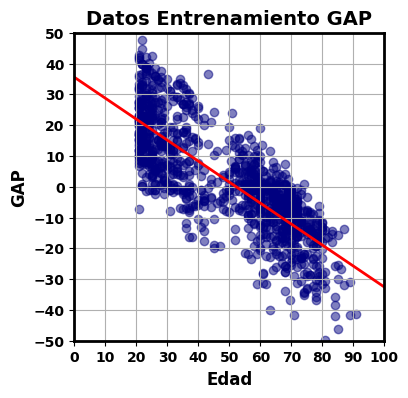

Error medio absoluto: 49.545444467986414
Error cuadrático medio: 3541.759035799201
Raíz del error cuadrático medio: 59.512679622070465
Coeficiente de determinación (R²): -7.845139040595061


In [13]:
svr_model.plot_regresion(x=svr_model.y_train,y=residuals,line_ideal=False,confidence_interval=False,x_min_limit=0,x_max_limit=100,legend=False,legend_metrics=False, title='Datos Entrenamiento GAP', xlabel='Edad', ylabel='GAP')

In [14]:
y_pred_corrected=svr_model.predicter_corrected()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     960.0
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.58e-91
Time:                        23:15:04   Log-Likelihood:                -1050.5
No. Observations:                 276   AIC:                             2105.
Df Residuals:                     274   BIC:                             2112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8348      1.681     -0.496      0.6

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


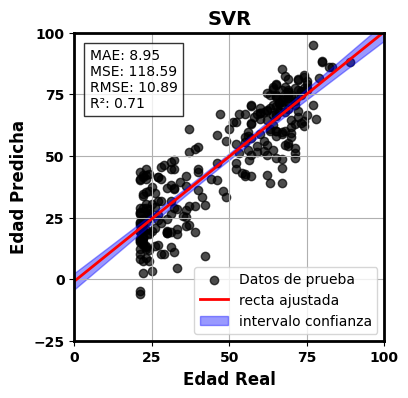

Error medio absoluto: 8.949074454042817
Error cuadrático medio: 118.59322723698185
Raíz del error cuadrático medio: 10.89005175547765
Coeficiente de determinación (R²): 0.7069654329452197


In [15]:
svr_model.plot_regresion(y=y_pred_corrected,x= svr_model.y_test,label_='Datos de prueba' ,x_ticks_step=25,y_ticks_step=25,x_max_limit=100,y_max_limit=100, title='SVR',line_ideal=False,confidence_interval=True, color='black',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

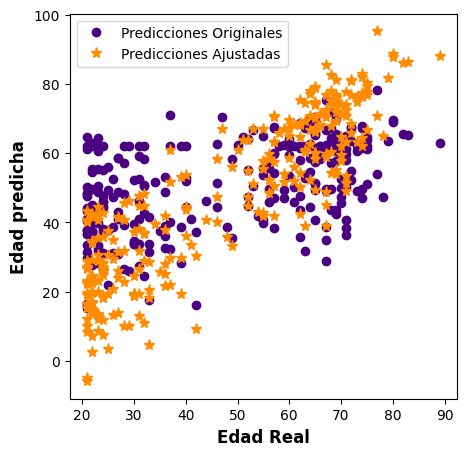

In [16]:
import matplotlib.pyplot as plt

# Gráfico de comparación antes y después de la corrección
plt.figure(figsize=(5, 5))
plt.plot(svr_model.y_test, y_pred, 'o', label='Predicciones Originales',color='indigo')
plt.plot(svr_model.y_test, y_pred_corrected, '*', label='Predicciones Ajustadas', color='darkorange', markersize=8)
#plt.plot([min(xgb_model.y_test), max(xgb_model.y_test)], [min(xgb_model.y_test), max(xgb_model.y_test)], '--', color='black', label='Línea Ideal')
plt.xlabel('Edad Real', fontweight='bold', fontsize=12)
plt.ylabel('Edad predicha', fontweight='bold', fontsize=12)
plt.legend()
#plt.title(f'MAE antes: {mae_before:.4f}, MAE después: {mae_after:.4f}')
plt.show()

In [17]:
#with open(f'{path}Brain_Age/Age_Array/svr_edad_predicha_array.pickle', 'wb') as file:
#       pickle.dump(y_pred_corrected, file)

In [22]:
shap_values_, shap_sumary_sorted_ = svr_model.feature_importance_shap(X_test = svr_model.X_test, model = svr_model.model)

Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=100.0, epsilon=1.0, gamma=0.01723069047203692, max_iter=5000)


100%|██████████| 276/276 [08:08<00:00,  1.77s/it]

Importancia de características basada en suma de valores SHAP:
IAF_OCC_right: 1022.3619146176115
IAF_OCC_left: 986.935579571501
TF_MFG_right: 869.9577033350023
Low_subj_spec_EPP_PARIET_left: 594.613635498269
IAF_IFG_right: 550.9908574466035
TF_ORB_left: 498.635176926682
TF_SFG_left: 482.949466633969
IAF_ORB_right: 472.27155112168066
TF_INS_right: 433.5913775471104
TF_INS_left: 402.2101993707763
IAF_ORB_left: 348.62497569726673
TF_SFG_right: 345.02824352098844
Low_subj_spec_EPP_CING_left: 344.94306426103526
TF_HPC_left: 297.6089821081495
IAF_INS_right: 281.57633492355455
TF_IFG_right: 276.16558854823217
Low_subj_spec_EPP_OCC_right: 238.11891255743748
Alpha2_canon_EPP_OCC_left: 221.9173624745499
Alpha2_canon_RPD_OCC_left: 221.87540430934152
Low_subj_spec_RPD_OCC_left: 221.15812738267522
IAF_IFG_left: 217.885096640189
IAF_MFG_right: 217.04786060757434
IAF_HPC_right: 210.1452553154808
IAF_INS_left: 204.69355826636357
Low_subj_spec_RPD_CING_right: 187.2189154793276
TF_IFG_left: 178.92969100

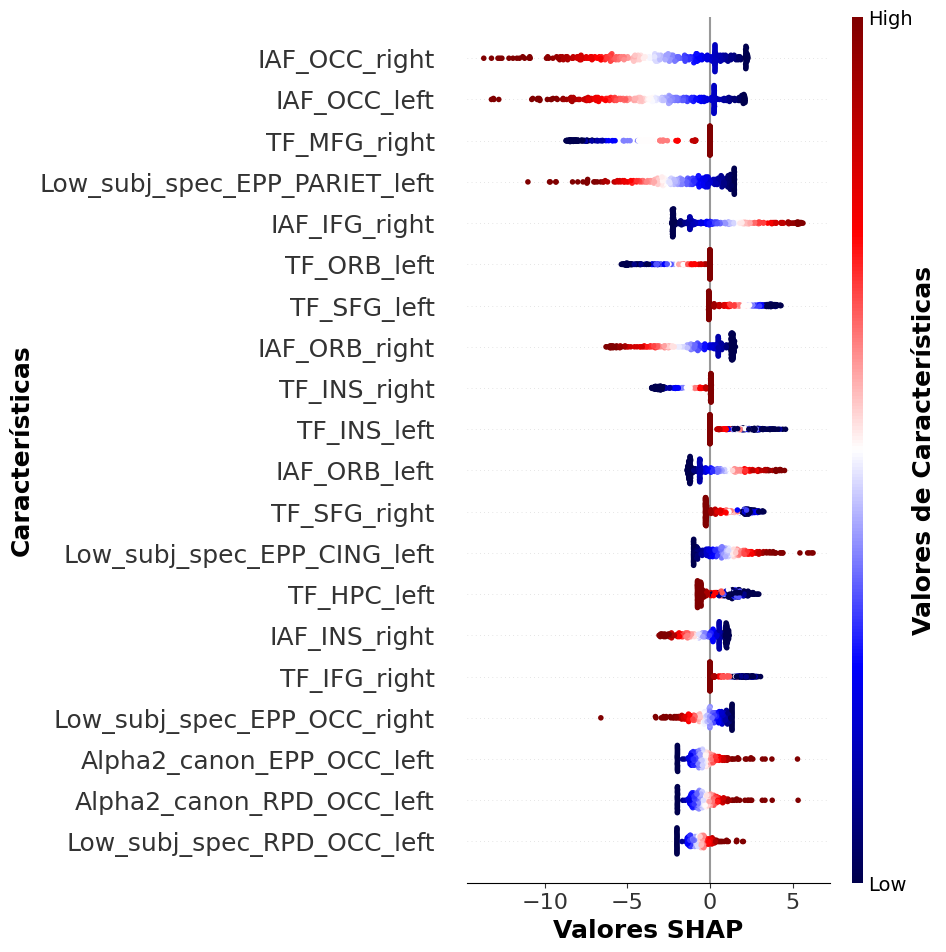

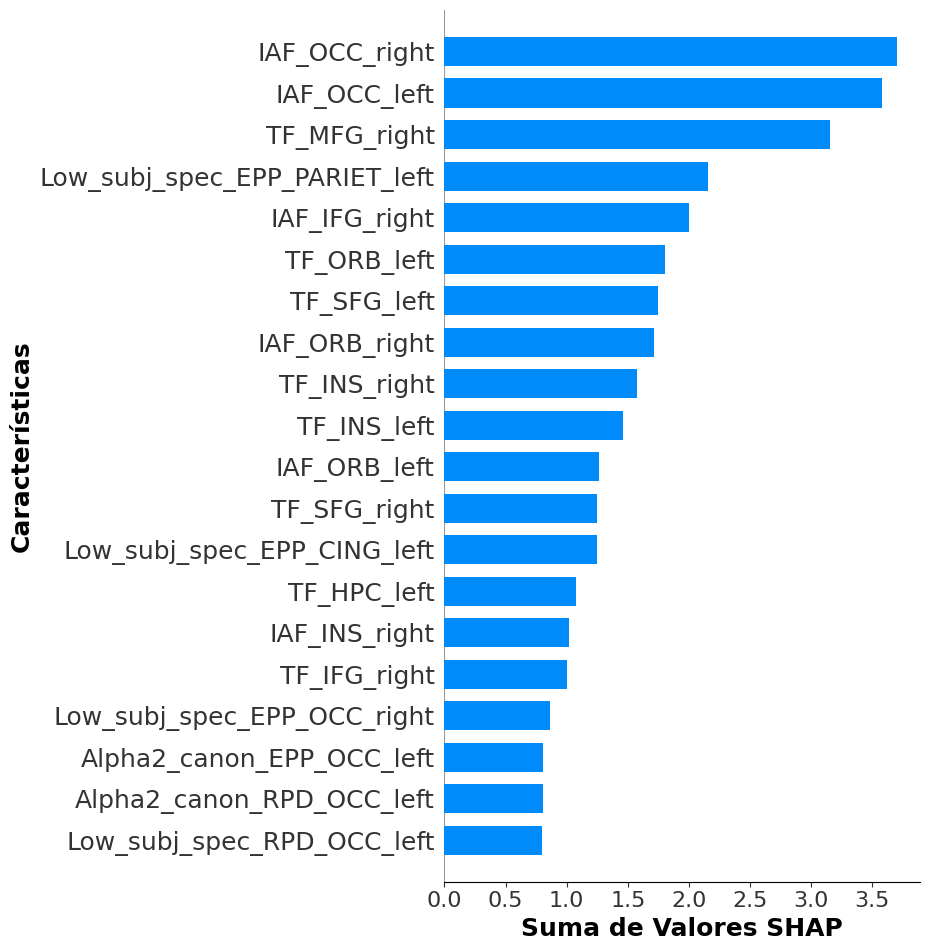

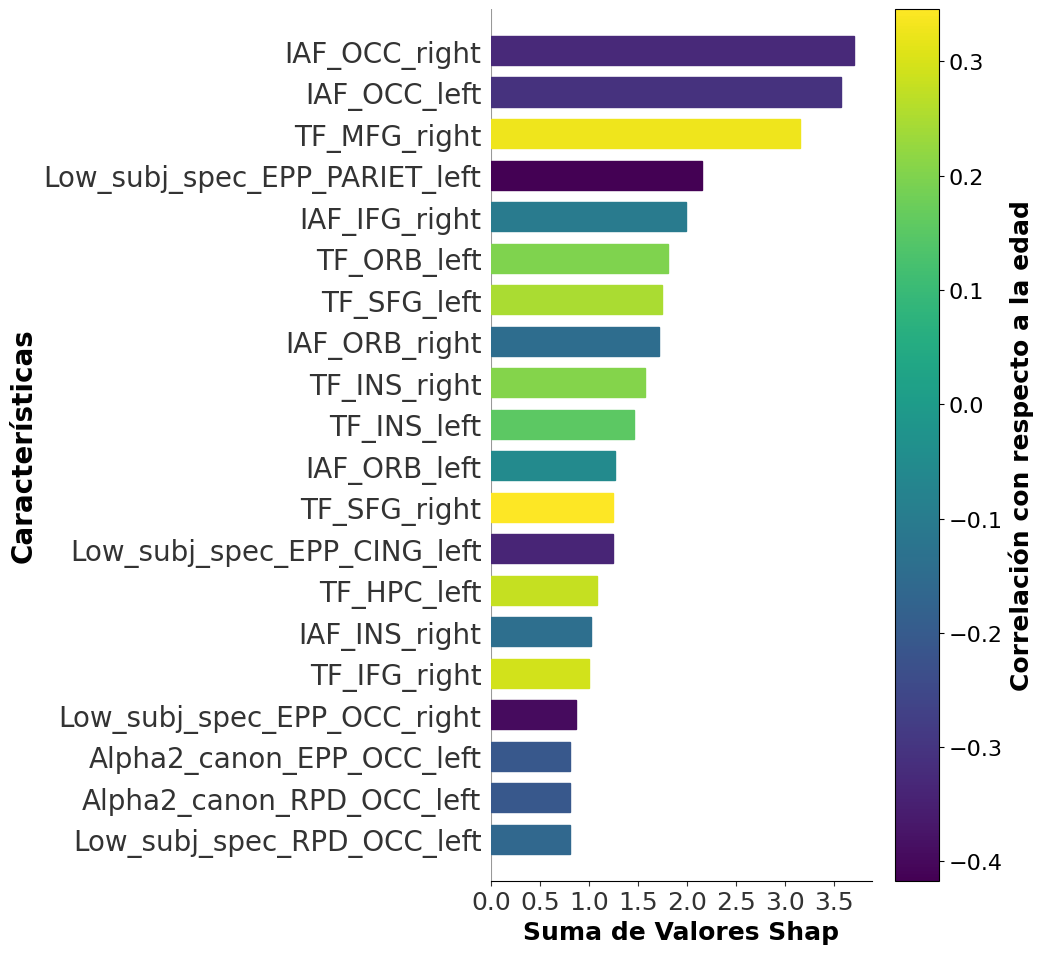

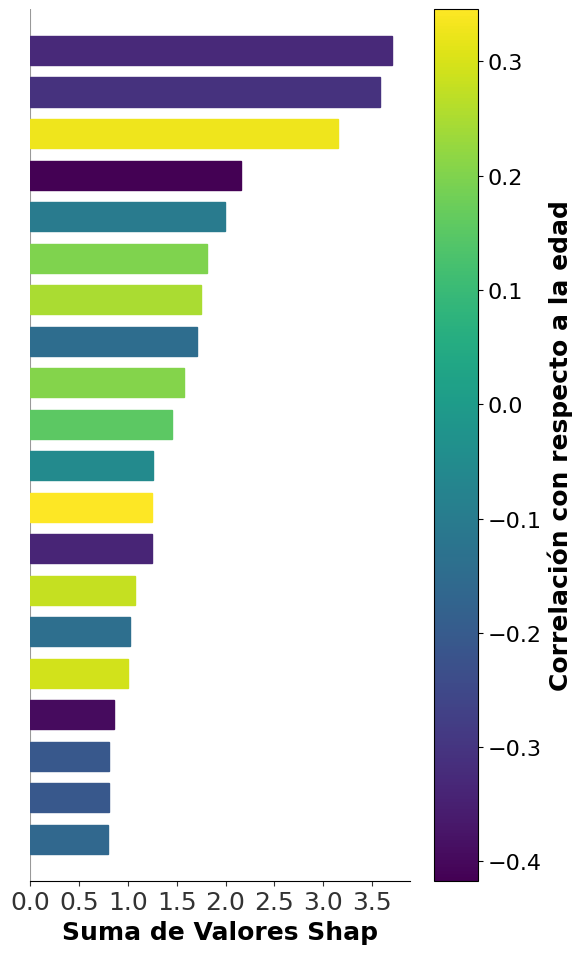

In [23]:
svr_model.plot_feature_importance(shap_values=shap_values_,X_test=svr_model.X_test,y_test=svr_model.y_test)

In [28]:
with open(f'{path}Opt_Model/shap_values_svr.pickle', 'wb') as file:
        pickle.dump(shap_values_, file)
with open(f'{path}Opt_Model/shap_summary_sorte_svr.pickle', 'wb') as file:
        pickle.dump(shap_sumary_sorted_, file)

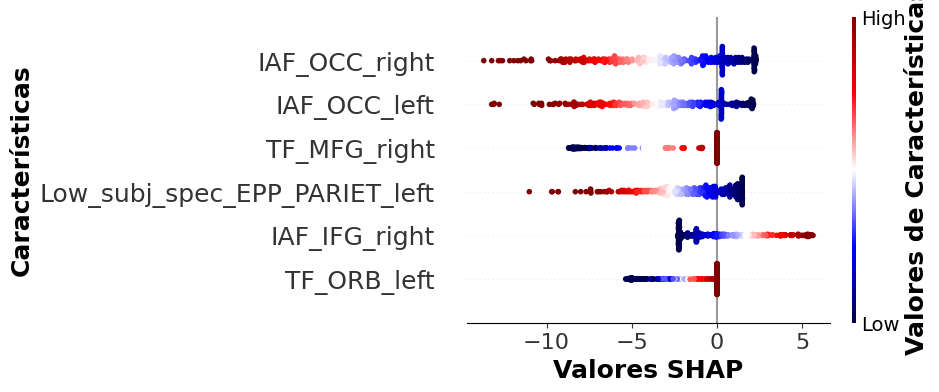

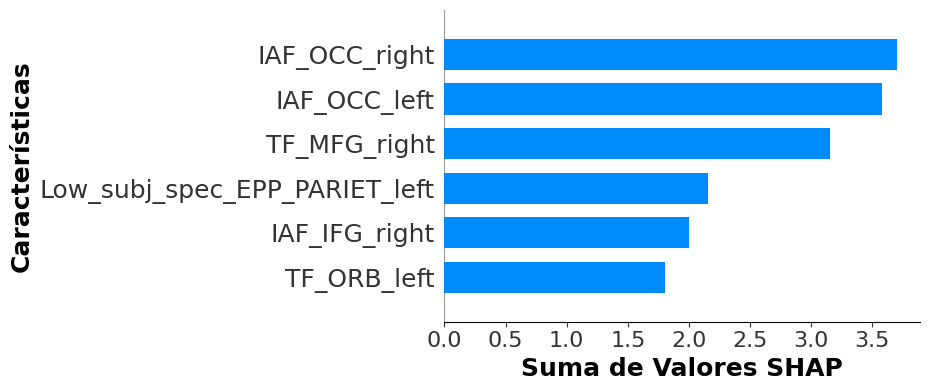

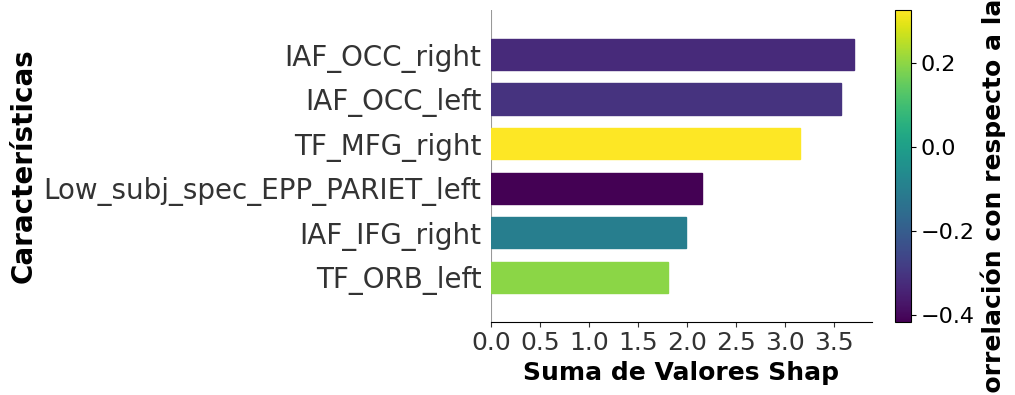

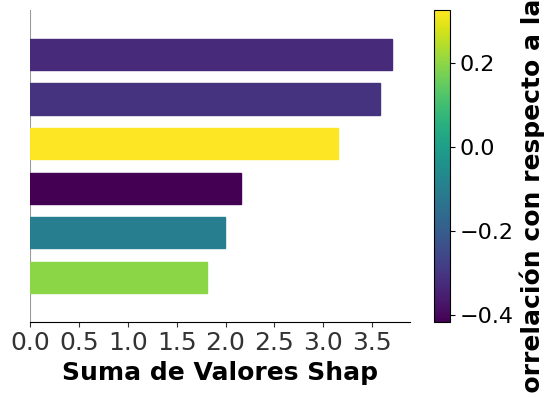

In [25]:
svr_model.plot_feature_importance(shap_values=shap_values_,X_test=svr_model.X_test,y_test=svr_model.y_test, max_features=6)

# Importancia por region

In [3]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_svr.pickle', 'rb') as file:
    shap_summary_sorted_svr = pickle.load(file)


In [29]:
shap_por_region_sorted, resultado_normalizado_sorted=svr_model.shap_region(shap_summary_sorted=shap_sumary_sorted_, num_max=20)

OCC_left: 1.000000
OCC_right: 0.763055
MFG_right: 0.526645
ORB_left: 0.512905
IFG_right: 0.500734
INS_right: 0.432940
PARIET_left: 0.359960
SFG_left: 0.292362
ORB_right: 0.285898
INS_left: 0.243485
SFG_right: 0.208869
CING_left: 0.208818
HPC_left: 0.180163


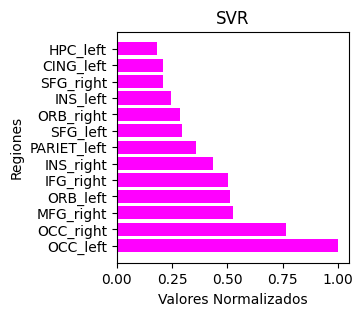

In [30]:
svr_model.plot_normalized_values(resultado_normalizado_sorted, color='magenta', name_set='SVR',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


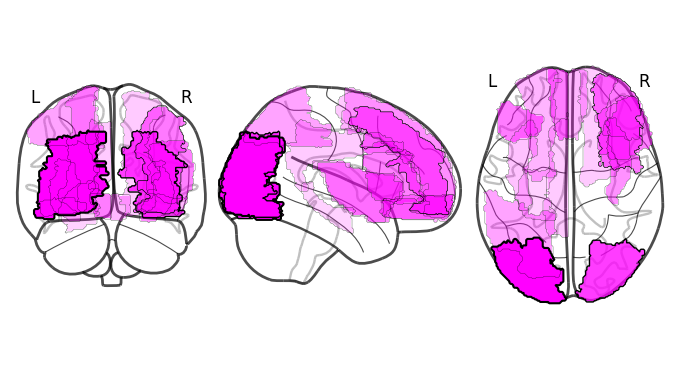

In [31]:
base_path = f'{path}cerebritos/'

svr_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='magenta')